# 🧠 Loan Default Classification Project

## Logistic Regression with Cleaned Data and P-Values

/Volumes/DevDereks
Root contents: ['com.apple.TimeMachine.localsnapshots', 'Macintosh HD', 'DevDereks', 'Backups', '.timemachine', 'Media']
DevDereks contents: ['.adobeTemp', '.DocumentRevisions-V100', '.DS_Store', '.fseventsd', '.Media Preferences.plist', '.PKInstallSandboxManager', '.Spotlight-V100', '.TemporaryItems', '.Trashes', '1346f2ea-c91d-4fcc-8cf7-39201ec72b90.jpg', '1638654184776440264_Conduent Data Analyst - Resume.pdf', '1889post-impressionism_mac.pkg', '2023 How to Invest in the Stock Market Workshop.docx', '2025PerScholasEnrollmentAgreement--2025-04-2501_01pm.pdf', '3fcf1834-1521-416d-834b-8eb828974a3a.jpg', '45db229b-0d10-4f8b-ac92-b8897793cd0f.jpg', '601471dd-c50b-4559-b6d1-526b1c400b0b.jpg', '6d7b498c-1fa6-48a0-abac-93f6326c1a38.jpg', 'abstract_mac.pkg', 'Adobe Acrobat DC', 'Adobe Creative Cloud', 'Advanced_Cybersecurity_Quiz_With_Explanations.ipynb', 'Affinity Designer 2.app', 'Affinity Photo 2.app', 'Affinity Publisher 2.app', 'Anaconda-Navigator.app', 'animation_ma

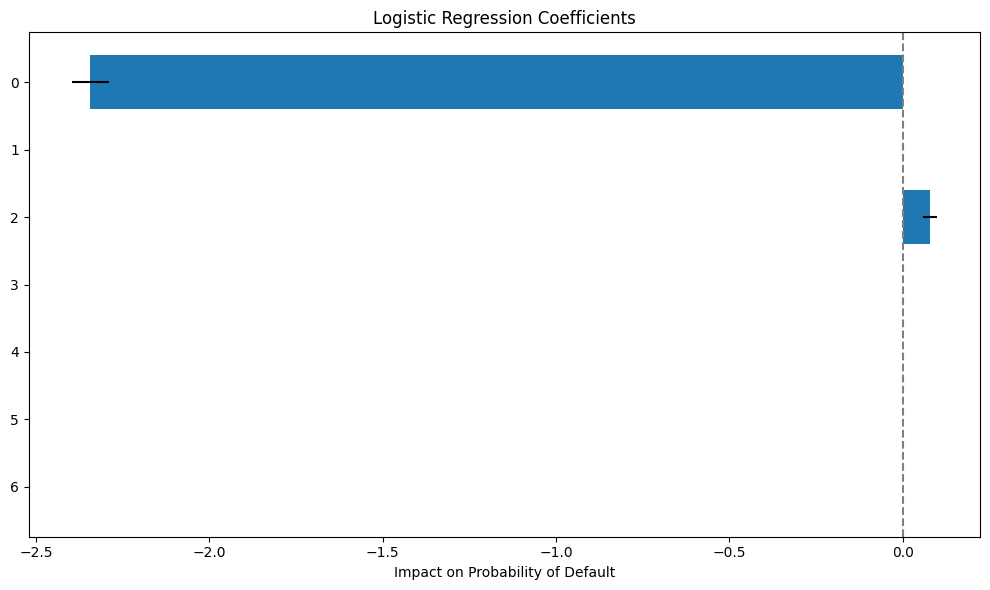

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import os
print(os.getcwd())


# Step-by-step check
print("Root contents:", os.listdir("/Volumes"))
print("DevDereks contents:", os.listdir("/Volumes/DevDereks"))
print("Check if 'module6' exists:", "module6" in os.listdir("/Volumes/DevDereks"))


# STEP 1: Load and clean the dataset
df = pd.read_csv("/Volumes/DevDereks/python-assignments/module6/loan_data.csv")

# Drop non-numeric columns if any (like names or IDs)
df = df.select_dtypes(include=[np.number])

# Drop rows with missing values
df = df.dropna()

# STEP 2: Split into features and target
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Clean and align
X_numeric = X_train.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
y_numeric = pd.to_numeric(y_train, errors='coerce')
df_combined = pd.concat([X_numeric, y_numeric.rename("TARGET")], axis=1).dropna()
X_final = df_combined.drop(columns="TARGET").to_numpy()
y_final = df_combined["TARGET"].to_numpy()

# STEP 5: Logistic regression
X_final_sm = sm.add_constant(X_final, has_constant='add')
logit_model = sm.Logit(y_final, X_final_sm)
result = logit_model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import pandas as pd

# Convert result.conf_int() and result.params to Series/DataFrames explicitly
conf = pd.DataFrame(result.conf_int(), columns=['Lower Bound', 'Upper Bound'])
coefficients = pd.Series(result.params, name='Coefficient')

# Combine into one DataFrame
coeff_df = pd.concat([coefficients, conf], axis=1)

# Sort by absolute value of coefficient
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coeff_df.index, coeff_df['Coefficient'], 
         xerr=(coeff_df['Upper Bound'] - coeff_df['Lower Bound']) / 2)
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Impact on Probability of Default')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()